In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [8]:
# Cargar el conjunto de datos CSV
df = pd.read_csv("AirPassengers.csv")

df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


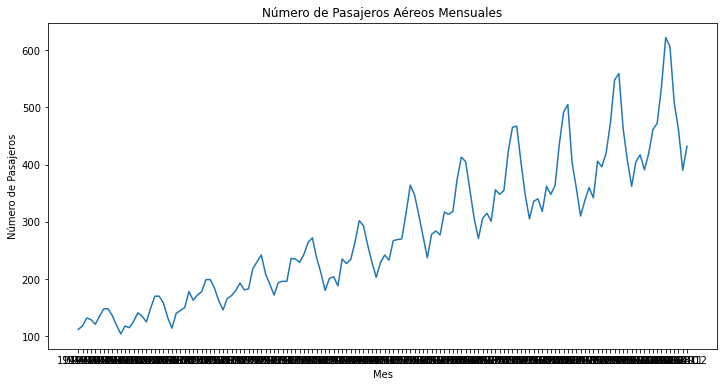

In [9]:
# Mostrar las primeras filas del conjunto de datos
print(df.head())

# Visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(df["Month"], df["#Passengers"])
plt.title("Número de Pasajeros Aéreos Mensuales")
plt.xlabel("Mes")
plt.ylabel("Número de Pasajeros")
plt.show()

####  Preprocesar los datos
Para entrenar una red LSTM, es importante preprocesar los datos. En este caso, normalizaremos los valores y dividiremos los datos en conjuntos de entrenamiento y prueba.

In [11]:
# Extraer la columna de pasajeros como datos de entrada
data = df["#Passengers"].values.astype(float)

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(data) * 0.7)
train_data, test_data = data[:train_size], data[train_size:]


#### Preparar los datos para la red LSTM
Para entrenar la red LSTM, necesitas crear secuencias de datos con ventanas de tiempo. Esto implica crear X (entradas) y Y (salidas) basadas en un historial de tiempo.

In [29]:
def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

seq_length = 20  # Longitud de la secuencia de entrada (puedes ajustarla)
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


### Construir y entrenar la red LSTM
Ahora, puedes construir la arquitectura de la red LSTM y entrenarla.

In [30]:
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

# Entrenar la red neuronal
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
3/3 [==============================] - 1s 125ms/step - loss: 0.0975 - val_loss: 0.4902
Epoch 2/100
3/3 [==============================] - 0s 49ms/step - loss: 0.0782 - val_loss: 0.4110
Epoch 3/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0597 - val_loss: 0.3320
Epoch 4/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0437 - val_loss: 0.2560
Epoch 5/100
3/3 [==============================] - 0s 59ms/step - loss: 0.0290 - val_loss: 0.1822
Epoch 6/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0178 - val_loss: 0.1121
Epoch 7/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0099 - val_loss: 0.0554
Epoch 8/100
3/3 [==============================] - 0s 46ms/step - loss: 0.0079 - val_loss: 0.0276
Epoch 9/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0102 - val_loss: 0.0237
Epoch 10/100
3/3 [==============================] - 0s 56ms/step - loss: 0.0099 - val_loss: 0.0298
Epoch 11/100
3/3 [

3/3 [==============================] - 0s 53ms/step - loss: 0.0037 - val_loss: 0.0177
Epoch 83/100
3/3 [==============================] - 0s 53ms/step - loss: 0.0037 - val_loss: 0.0174
Epoch 84/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0037 - val_loss: 0.0171
Epoch 85/100
3/3 [==============================] - 0s 69ms/step - loss: 0.0037 - val_loss: 0.0171
Epoch 86/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0037 - val_loss: 0.0171
Epoch 87/100
3/3 [==============================] - 0s 49ms/step - loss: 0.0037 - val_loss: 0.0167
Epoch 88/100
3/3 [==============================] - 0s 50ms/step - loss: 0.0036 - val_loss: 0.0166
Epoch 89/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0036 - val_loss: 0.0164
Epoch 90/100
3/3 [==============================] - 0s 60ms/step - loss: 0.0038 - val_loss: 0.0169
Epoch 91/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0036 - val_loss: 0.0161
Epoch 92/100
3/3 [=====

In [31]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)


1/1 [==============================] - 0s 121ms/step


In [32]:

# Desnormalizar las predicciones
predictions = scaler.inverse_transform(predictions)



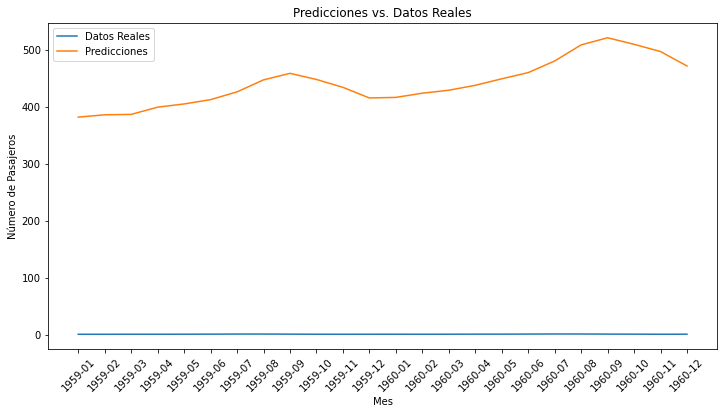

In [33]:

# Recortar las fechas para que tengan la misma longitud que los datos de prueba
dates = df["Month"].iloc[train_size+seq_length:train_size+seq_length+len(test_data)].values

# Convertir las fechas a cadenas de caracteres
dates = [str(date) for date in dates]

# Visualizar las predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label="Datos Reales")
plt.plot(dates, predictions, label="Predicciones")
plt.title("Predicciones vs. Datos Reales")
plt.xlabel("Mes")
plt.ylabel("Número de Pasajeros")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para una mejor visualización
plt.legend()
plt.show()

